In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

In [2]:
# Convert ExitDate and StartDate to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')

# Create a new column 'Attrition' based on ExitDate or IsActive
df['Attrition'] = df['IsActive'].apply(lambda x: 'Active' if x == 1 else 'Exited')

# Optional: create Tenure in years
df['TenureYears'] = df['TenureDays'] / 365


C:\Users\alanm\AppData\Local\Temp\ipykernel_5776\2045241143.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')


Attrition
Exited    1533
Active    1467
Name: count, dtype: int64


C:\Users\alanm\AppData\Local\Temp\ipykernel_5776\3909917366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


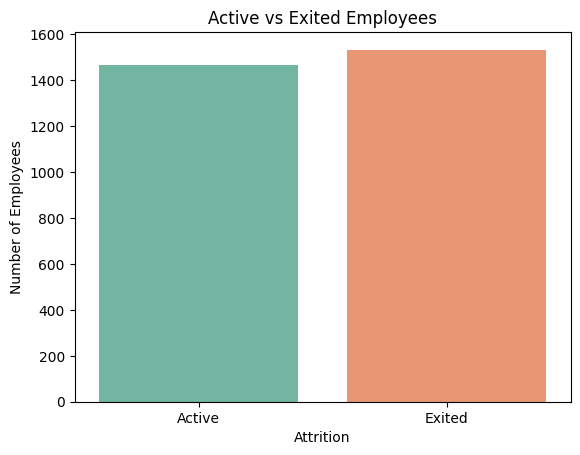

In [3]:
# Count of Active vs Exited
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

# Plot
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Active vs Exited Employees")
plt.ylabel("Number of Employees")
plt.show()


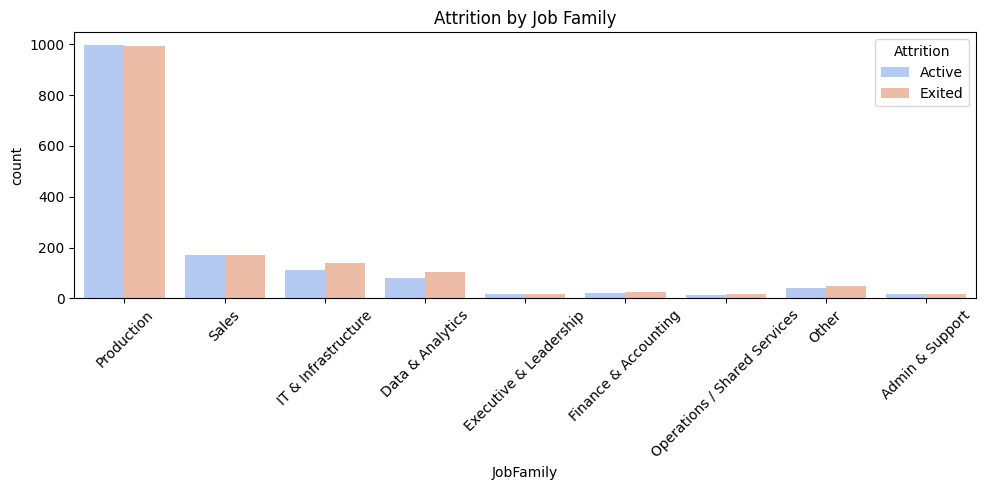

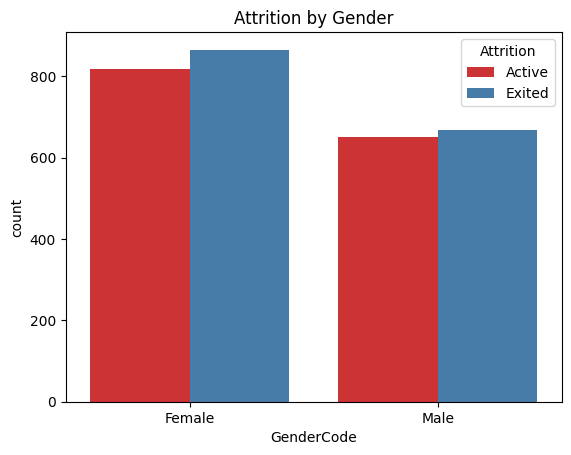

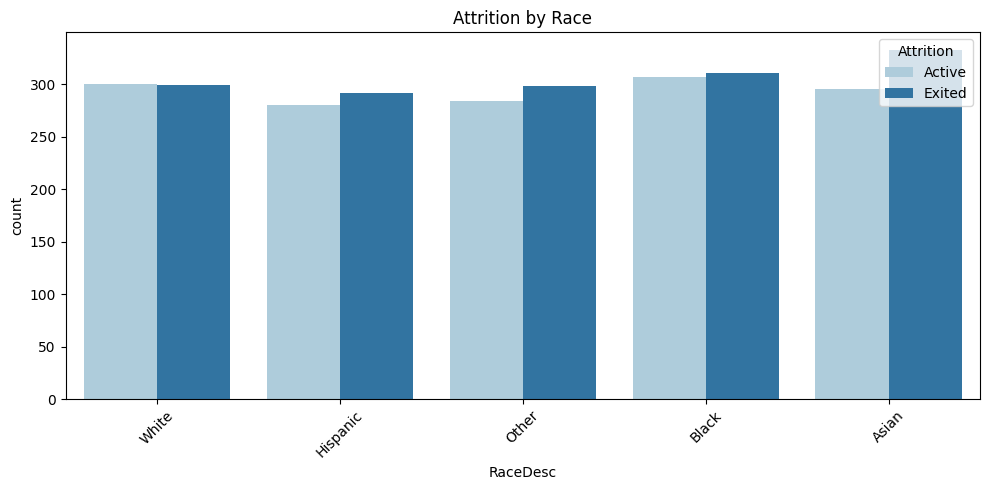

In [4]:
# Plot attrition by department
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobFamily', hue='Attrition', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Attrition by Job Family")
plt.tight_layout()
plt.show()

# Attrition by Gender
sns.countplot(data=df, x='GenderCode', hue='Attrition', palette='Set1')
plt.title("Attrition by Gender")
plt.show()

# Attrition by Race
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='RaceDesc', hue='Attrition', palette='Paired')
plt.xticks(rotation=45)
plt.title("Attrition by Race")
plt.tight_layout()
plt.show()


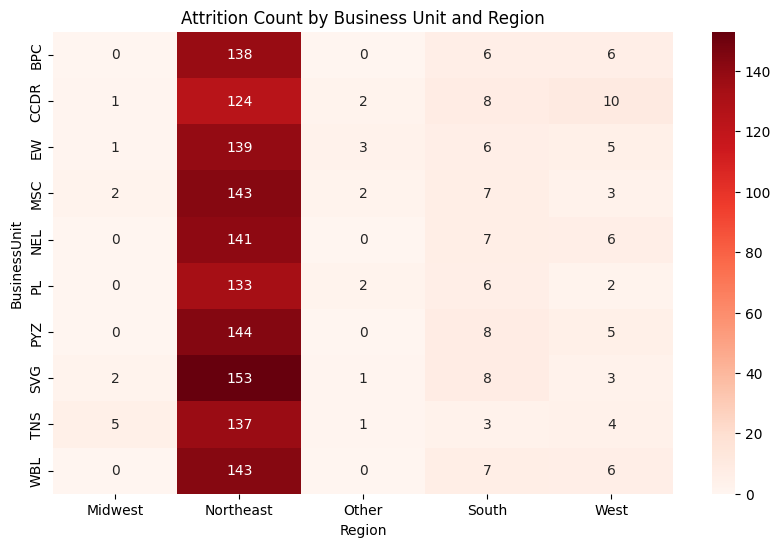

In [5]:
# Create pivot table
heatmap_data = pd.pivot_table(df, index='BusinessUnit', columns='Region',
                               values='Attrition', aggfunc=lambda x: (x == 'Exited').sum())

# Fill NaNs with 0 and convert to int
heatmap_data = heatmap_data.fillna(0).astype(int)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds')
plt.title("Attrition Count by Business Unit and Region")
plt.show()


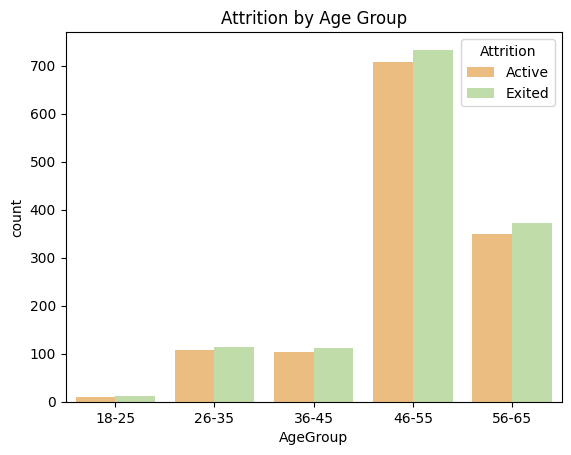

In [6]:
# Create Age Groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot attrition by age group
sns.countplot(data=df, x='AgeGroup', hue='Attrition', palette='Spectral')
plt.title("Attrition by Age Group")
plt.show()


C:\Users\alanm\AppData\Local\Temp\ipykernel_5776\1182718262.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')
C:\Users\alanm\AppData\Local\Temp\ipykernel_5776\1182718262.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2', ax=axes[0,0])


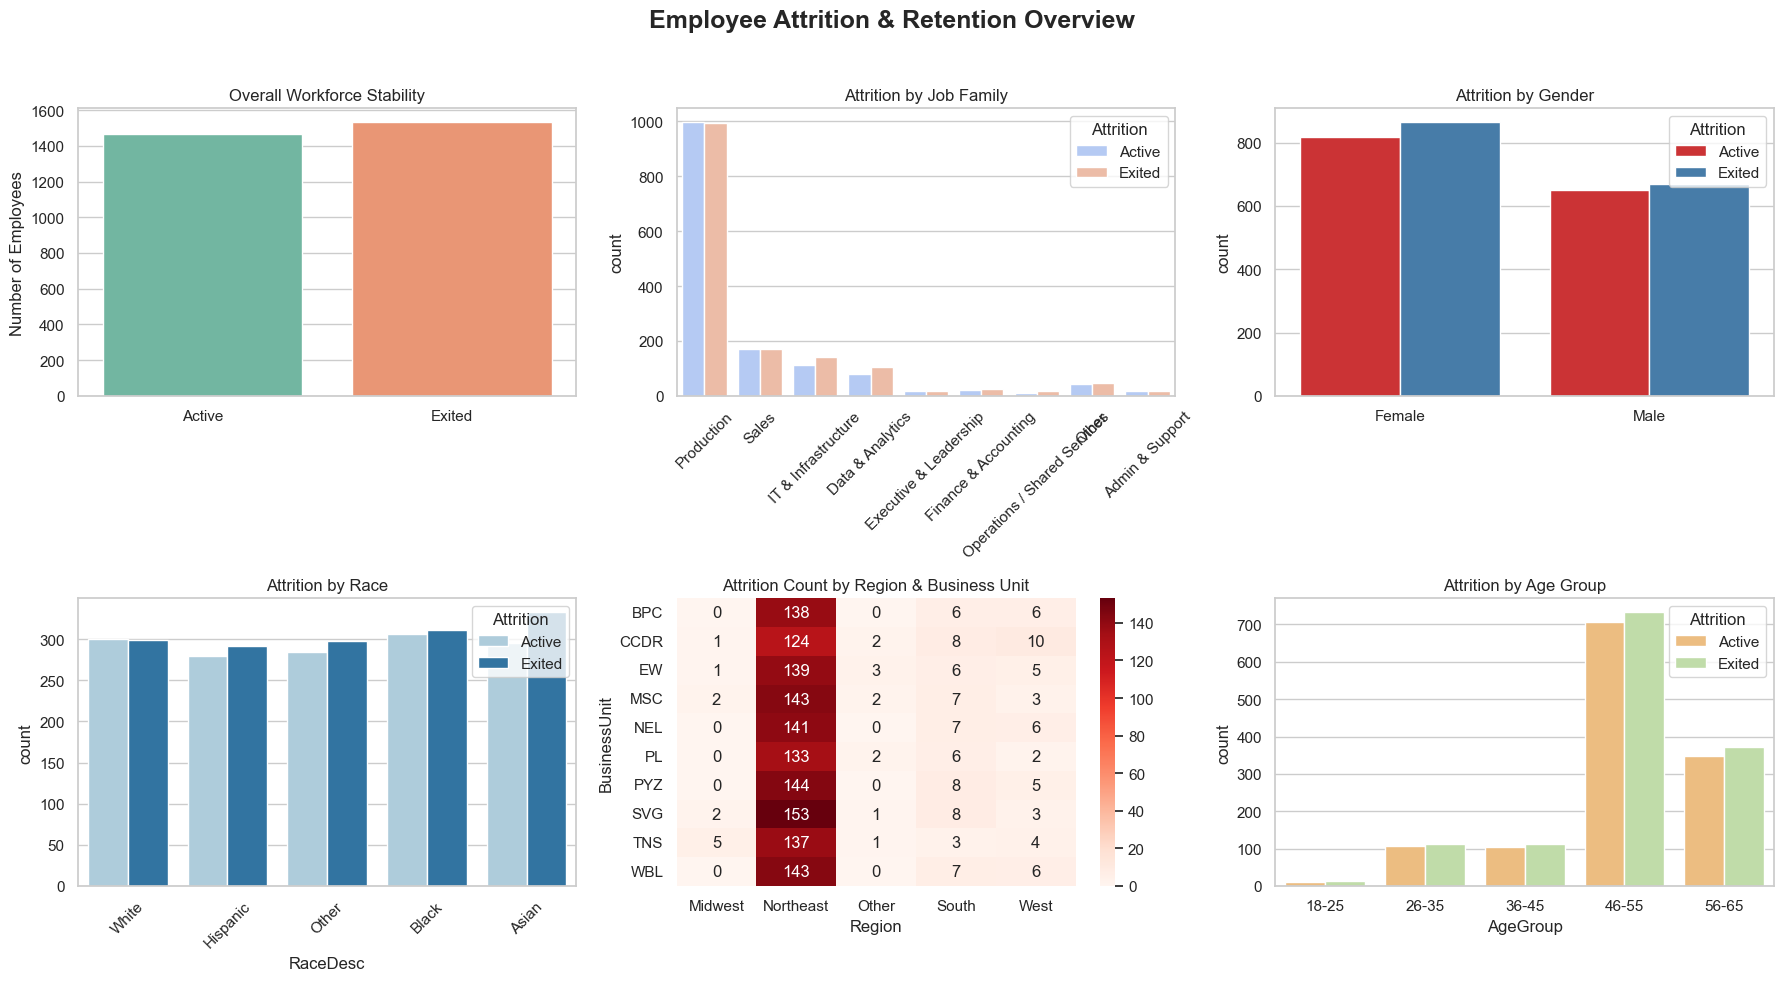

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and prepare data ---
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Convert date columns
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')

# Create Attrition label
df['Attrition'] = df['IsActive'].apply(lambda x: 'Active' if x == 1 else 'Exited')

# Tenure in years
df['TenureYears'] = df['TenureDays'] / 365

# Create Age Groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# --- Create Combined Visualization ---
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Employee Attrition & Retention Overview", fontsize=18, fontweight='bold')

# 1️⃣ Overall Attrition Count
sns.countplot(data=df, x='Attrition', palette='Set2', ax=axes[0,0])
axes[0,0].set_title("Overall Workforce Stability")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Number of Employees")

# 2️⃣ Attrition by Department
sns.countplot(data=df, x='JobFamily', hue='Attrition', palette='coolwarm', ax=axes[0,1])
axes[0,1].set_title("Attrition by Job Family")
axes[0,1].set_xlabel("")
axes[0,1].tick_params(axis='x', rotation=45)

# 3️⃣ Attrition by Gender
sns.countplot(data=df, x='GenderCode', hue='Attrition', palette='Set1', ax=axes[0,2])
axes[0,2].set_title("Attrition by Gender")
axes[0,2].set_xlabel("")

# 4️⃣ Attrition by Race
sns.countplot(data=df, x='RaceDesc', hue='Attrition', palette='Paired', ax=axes[1,0])
axes[1,0].set_title("Attrition by Race")
axes[1,0].tick_params(axis='x', rotation=45)

# 5️⃣ Attrition by Region & Business Unit (Heatmap)
heatmap_data = pd.pivot_table(df, index='BusinessUnit', columns='Region',
                               values='Attrition', aggfunc=lambda x: (x == 'Exited').sum())
heatmap_data = heatmap_data.fillna(0).astype(int)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', ax=axes[1,1])
axes[1,1].set_title("Attrition Count by Region & Business Unit")

# 6️⃣ Attrition by Age Group
sns.countplot(data=df, x='AgeGroup', hue='Attrition', palette='Spectral', ax=axes[1,2])
axes[1,2].set_title("Attrition by Age Group")

# --- Adjust Layout ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\alanm\AppData\Local\Temp\ipykernel_5776\2828036283.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.5, h_pad=3.5, w_pad=2.5)


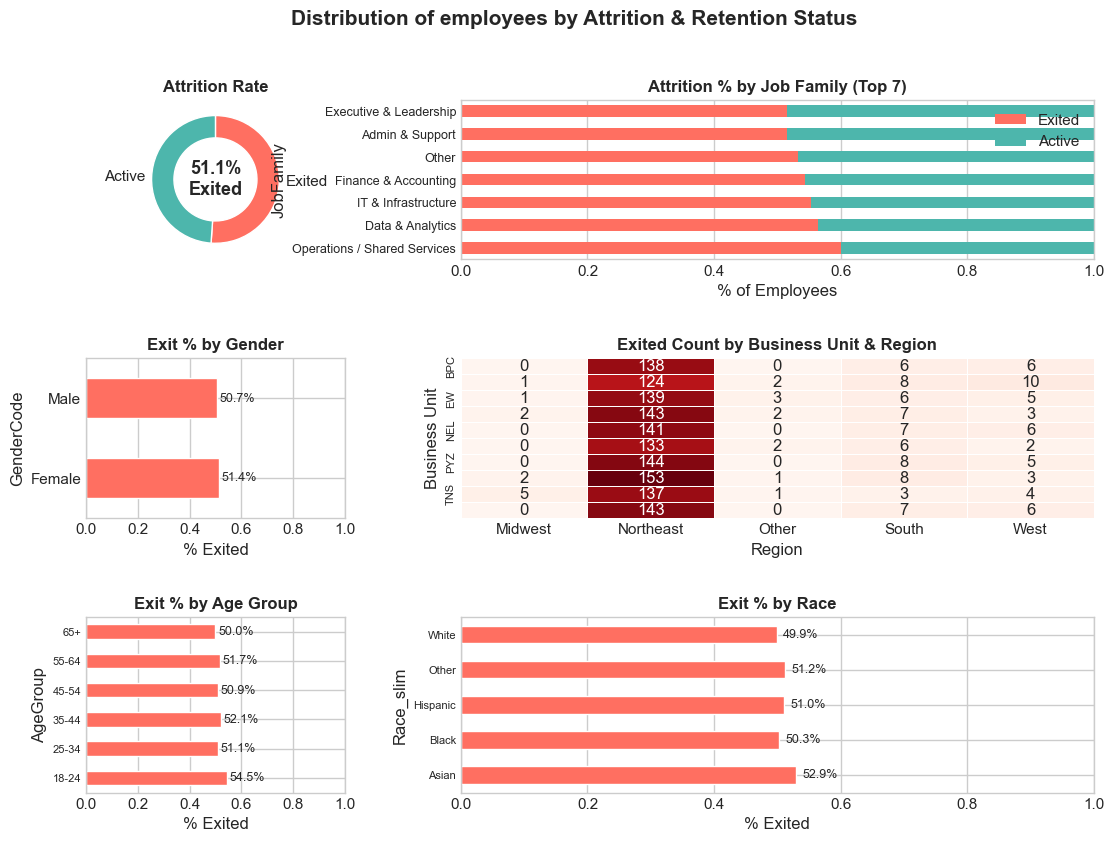

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# === Data (replace with your actual dataframe) ===
# df = pd.read_csv("cleaned_mapped_employee_data.csv")

# Ensure proper data types and fill missing values safely
for col in ['GenderCode', 'AgeGroup', 'Race_slim', 'Region', 'BusinessUnit', 'JobFamily']:
    if col in df.columns:
        df[col] = df[col].astype(str).fillna("Unknown")

# === Create Figure ===
plt.style.use("seaborn-v0_8-whitegrid")
fig = plt.figure(figsize=(13, 9))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1.1], hspace=0.6, wspace=0.45)
palette = ["#FF6F61", "#4DB6AC"]

# === 1. Attrition Rate (Donut) ===
ax1 = plt.subplot(gs[0, 0])
attr_counts = df['Attrition'].value_counts()
ax1.pie(attr_counts, labels=['Exited', 'Active'], colors=palette,
        startangle=90, counterclock=False, wedgeprops={'width': 0.35, 'edgecolor': 'w'})
center_text = f"{(attr_counts['Exited'] / attr_counts.sum()) * 100:.1f}%\nExited"
ax1.text(0, 0, center_text, ha='center', va='center', fontsize=13, fontweight='bold')
ax1.set_title("Attrition Rate", fontsize=12, fontweight='bold')

# === 2. Attrition % by Job Family (Stacked Bar) ===
ax2 = plt.subplot(gs[0, 1:])
job = pd.crosstab(df['JobFamily'], df['Attrition'])
job = job.div(job.sum(axis=1), axis=0).sort_values('Exited', ascending=False).head(7)
job[['Exited', 'Active']].plot(kind='barh', stacked=True, color=palette, ax=ax2, edgecolor='none')
ax2.set_title("Attrition % by Job Family (Top 7)", fontsize=12, fontweight='bold')
ax2.set_xlabel("% of Employees")
ax2.legend(loc='upper right', frameon=False)
ax2.set_xlim(0, 1)
ax2.tick_params(axis='y', labelsize=9)

# === 3. Exit % by Gender ===
ax3 = plt.subplot(gs[1, 0])
gender = pd.crosstab(df['GenderCode'], df['Attrition'])
gender = gender.div(gender.sum(axis=1), axis=0)
gender['Exited'].plot(kind='barh', color=palette[0], ax=ax3)
ax3.set_title("Exit % by Gender", fontsize=12, fontweight='bold')
ax3.set_xlabel("% Exited")
ax3.set_xlim(0, 1)
for i, v in enumerate(gender['Exited']):
    ax3.text(v + 0.01, i, f"{v*100:.1f}%", va='center', fontsize=9)
# ✅ Safe legend removal
leg = ax3.get_legend()
if leg:
    leg.remove()

# === 4. Exit Count by Business Unit & Region (Heatmap) ===
ax4 = plt.subplot(gs[1, 1:])
pivot = pd.crosstab(df['BusinessUnit'], df['Region'], df['Attrition'] == 'Exited', aggfunc='sum').fillna(0)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Reds", cbar=False, ax=ax4, linewidths=0.5)
ax4.set_title("Exited Count by Business Unit & Region", fontsize=12, fontweight='bold')
ax4.set_xlabel("Region")
ax4.set_ylabel("Business Unit")
ax4.tick_params(axis='y', labelsize=8)

# === 5. Exit % by Age Group ===
ax5 = plt.subplot(gs[2, 0])
age = pd.crosstab(df['AgeGroup'], df['Attrition'])
age = age.div(age.sum(axis=1), axis=0)
age['Exited'].plot(kind='barh', color=palette[0], ax=ax5)
ax5.set_title("Exit % by Age Group", fontsize=12, fontweight='bold')
ax5.set_xlabel("% Exited")
ax5.set_xlim(0, 1)
for i, v in enumerate(age['Exited']):
    ax5.text(v + 0.01, i, f"{v*100:.1f}%", va='center', fontsize=9)
ax5.tick_params(axis='y', labelsize=8)
leg = ax5.get_legend()
if leg:
    leg.remove()

# === 6. Exit % by Race ===
ax6 = plt.subplot(gs[2, 1:])
race = pd.crosstab(df['Race_slim'], df['Attrition'])
race = race.div(race.sum(axis=1), axis=0)
race['Exited'].plot(kind='barh', color=palette[0], ax=ax6)
ax6.set_title("Exit % by Race", fontsize=12, fontweight='bold')
ax6.set_xlabel("% Exited")
ax6.set_xlim(0, 1)
for i, v in enumerate(race['Exited']):
    ax6.text(v + 0.01, i, f"{v*100:.1f}%", va='center', fontsize=9)
ax6.tick_params(axis='y', labelsize=8)
leg = ax6.get_legend()
if leg:
    leg.remove()

# === Overall Title ===
fig.suptitle("Distribution of employees by Attrition & Retention Status",
             fontsize=15, fontweight='bold', y=0.98)

plt.tight_layout(pad=2.5, h_pad=3.5, w_pad=2.5)
plt.show()
